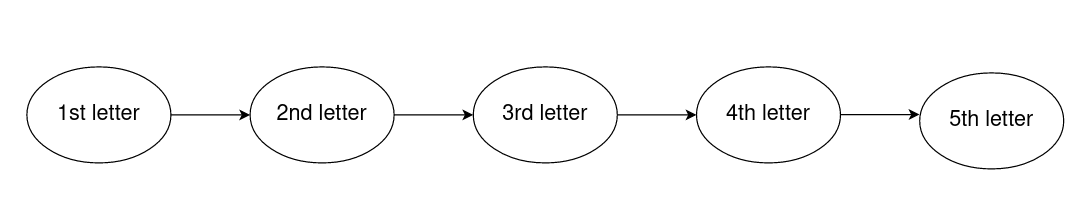

In [31]:
from IPython.display import Image
Image("BayesianNetworkSimple.png")

In [32]:
import numpy as np

In [2]:
letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T"
           , "U", "V", "W", "X", "Y", "Z"]

In [3]:
lines = []

with open('words.txt') as f:
    lines = f.readlines()

In [13]:
# probability first letter

probabilites_1 = [0] * 26

for word in lines: 
    index = letters.index(word[0])
    probabilites[index] += 1
    
probabilites_1 = [x / (len(lines) - 1) for x in probabilites]

In [15]:
import pandas as pd

pd.DataFrame.from_dict(
    dict(zip(letters, probabilites_1)), 
    columns=["freq"], 
    orient="index"
)

,freq
A,0.058462
B,0.069206
C,0.016604
D,0.041161
E,0.036835
F,0.055393
G,0.045486
H,0.052044
I,0.015348
J,0.015488


In [84]:
def calculate_conditional_probability(letter_index):

    count_prev_letter = np.zeros(26)
    probabilities = np.zeros([26, 26])

    for word in lines: 
        index_parent = letters.index(word[letter_index - 1])
        index = letters.index(word[letter_index])

        probabilities[index_parent][index] += 1
        count_prev_letter[index_parent] += 1

    probabilities = [[x / count_prev_letter[id_parent] if count_prev_letter[id_parent] > 0 else 0 for x in parent] for id_parent, parent in enumerate(probabilities)]
    
    return [*zip(*probabilities)]

In [85]:
# P(2nd letter | 1st letter)

pd.DataFrame.from_dict(
    dict(zip(letters, calculate_conditional_probability(1))), 
    columns=letters, 
    orient="index"
)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,0.031026,0.207661,0.184874,0.220339,0.007576,0.193955,0.208589,0.316354,0.045455,0.252252,...,0.0,0.317333,0.155689,0.236842,0.000000,0.185567,0.291096,0.0,0.384615,0.185345
B,0.155131,0.000000,0.000000,0.000000,0.053030,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.0,0.000000,0.000000
C,0.026253,0.000000,0.000000,0.000000,0.049242,0.000000,0.000000,0.000000,0.018182,0.000000,...,0.0,0.000000,0.053892,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
D,0.033413,0.000000,0.000000,0.000000,0.026515,0.000000,0.000000,0.000000,0.072727,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
E,0.002387,0.241935,0.033613,0.159322,0.000000,0.186398,0.226994,0.252011,0.000000,0.171171,...,0.0,0.245333,0.128743,0.119617,0.000000,0.195876,0.311644,0.6,0.076923,0.185345
F,0.011933,0.000000,0.000000,0.000000,0.007576,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.0,0.000000,0.000000
G,0.031026,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.054545,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
H,0.031026,0.000000,0.210084,0.000000,0.022727,0.000000,0.000000,0.000000,0.072727,0.000000,...,0.0,0.000000,0.014970,0.033493,0.009615,0.000000,0.006849,0.0,0.000000,0.000000
I,0.007160,0.098790,0.042017,0.159322,0.143939,0.151134,0.101227,0.101877,0.000000,0.018018,...,0.0,0.138667,0.095808,0.083732,0.000000,0.350515,0.157534,0.0,0.000000,0.206897
J,0.000000,0.000000,0.000000,0.003390,0.000000,0.007557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.004785,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [86]:
# P(3rd letter | 2nd letter)

pd.DataFrame.from_dict(
    dict(zip(letters, calculate_conditional_probability(2))), 
    columns=letters, 
    orient="index"
)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,0.009682,0.076923,0.076923,0.051282,0.020665,0.243243,0.103448,0.193878,0.016888,0.166667,...,0.0,0.281192,0.068966,0.226415,0.031289,0.500000,0.303030,0.038462,0.061224,0.000000
B,0.032503,0.098901,0.000000,0.000000,0.040431,0.000000,0.000000,0.000000,0.015682,0.000000,...,0.0,0.029795,0.000000,0.000000,0.028786,0.000000,0.000000,0.000000,0.000000,0.000000
C,0.042877,0.000000,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,0.056695,0.000000,...,0.0,0.005587,0.137931,0.000000,0.055069,0.000000,0.000000,0.000000,0.020408,0.000000
D,0.036653,0.000000,0.000000,0.051282,0.028751,0.000000,0.000000,0.000000,0.030157,0.000000,...,0.0,0.018622,0.000000,0.000000,0.052566,0.000000,0.000000,0.000000,0.040816,0.000000
E,0.000692,0.164835,0.015385,0.384615,0.035040,0.297297,0.344828,0.122449,0.193004,0.333333,...,0.0,0.156425,0.120690,0.220126,0.022528,0.166667,0.363636,0.346154,0.000000,0.357143
F,0.021438,0.021978,0.000000,0.000000,0.013477,0.189189,0.000000,0.000000,0.018094,0.000000,...,0.0,0.001862,0.000000,0.000000,0.037547,0.000000,0.000000,0.000000,0.000000,0.000000
G,0.051176,0.043956,0.000000,0.000000,0.052111,0.000000,0.172414,0.000000,0.036188,0.000000,...,0.0,0.027933,0.000000,0.000000,0.041302,0.000000,0.000000,0.000000,0.000000,0.000000
H,0.047026,0.098901,0.553846,0.000000,0.067385,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.007449,0.000000,0.031447,0.042553,0.000000,0.000000,0.000000,0.000000,0.000000
I,0.025588,0.043956,0.030769,0.179487,0.173405,0.054054,0.172414,0.132653,0.001206,0.000000,...,0.0,0.148976,0.017241,0.106918,0.018773,0.166667,0.272727,0.230769,0.000000,0.142857
J,0.004149,0.010989,0.000000,0.000000,0.002695,0.000000,0.000000,0.000000,0.001206,0.000000,...,0.0,0.001862,0.000000,0.000000,0.002503,0.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
# P(4th letter | 3rd letter)

pd.DataFrame.from_dict(
    dict(zip(letters, calculate_conditional_probability(3))), 
    columns=letters, 
    orient="index"
)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,0.005988,0.095455,0.015873,0.074689,0.018727,0.036232,0.071672,0.107023,0.019724,0.333333,...,0.0,0.067073,0.071611,0.092379,0.005236,0.056604,0.166667,0.000000,0.137931,0.032258
B,0.023952,0.068182,0.000000,0.000000,0.037453,0.000000,0.003413,0.000000,0.023669,0.000000,...,0.0,0.047256,0.005115,0.000000,0.049738,0.000000,0.000000,0.000000,0.000000,0.000000
C,0.041916,0.000000,0.007937,0.000000,0.037453,0.000000,0.000000,0.000000,0.055227,0.000000,...,0.0,0.013720,0.086957,0.006928,0.054974,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.037924,0.000000,0.000000,0.029046,0.022472,0.007246,0.000000,0.006689,0.043393,0.000000,...,0.0,0.042683,0.000000,0.000000,0.028796,0.000000,0.033333,0.000000,0.068966,0.000000
E,0.001996,0.422727,0.007937,0.510373,0.028090,0.282609,0.457338,0.207358,0.147929,0.333333,...,0.0,0.157012,0.263427,0.321016,0.133508,0.471698,0.366667,0.621622,0.206897,0.387097
F,0.013972,0.000000,0.000000,0.000000,0.022472,0.326087,0.000000,0.000000,0.037475,0.000000,...,0.0,0.030488,0.000000,0.000000,0.057592,0.000000,0.000000,0.000000,0.000000,0.000000
G,0.043912,0.000000,0.000000,0.008299,0.028090,0.000000,0.054608,0.000000,0.043393,0.000000,...,0.0,0.050305,0.000000,0.000000,0.060209,0.000000,0.000000,0.000000,0.000000,0.000000
H,0.019960,0.000000,0.444444,0.004149,0.048689,0.000000,0.013652,0.000000,0.031558,0.000000,...,0.0,0.000000,0.017903,0.011547,0.010471,0.000000,0.000000,0.000000,0.000000,0.000000
I,0.023952,0.059091,0.003968,0.120332,0.108614,0.072464,0.068259,0.030100,0.001972,0.041667,...,0.0,0.056402,0.058824,0.080831,0.018325,0.150943,0.133333,0.108108,0.000000,0.177419
J,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.002309,0.005236,0.000000,0.000000,0.000000,0.000000,0.000000


In [88]:
# P(5th letter | 4th letter)

pd.DataFrame.from_dict(
    dict(zip(letters, calculate_conditional_probability(4))), 
    columns=letters, 
    orient="index"
)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,0.000000,0.044872,0.024390,0.038278,0.000000,0.005263,0.036735,0.020305,0.022959,0.444444,...,0,0.068421,0.033613,0.039640,0.007843,0.030303,0.076923,0.000,0.00,0.012987
B,0.050761,0.025641,0.000000,0.000000,0.014556,0.000000,0.000000,0.000000,0.025510,0.000000,...,0,0.013158,0.000000,0.000000,0.039216,0.000000,0.000000,0.000,0.00,0.000000
C,0.002538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005102,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000
D,0.015228,0.000000,0.000000,0.000000,0.006550,0.000000,0.000000,0.000000,0.038265,0.000000,...,0,0.013158,0.000000,0.000000,0.023529,0.000000,0.000000,0.000,0.00,0.000000
E,0.007614,0.423077,0.060976,0.483254,0.006550,0.378947,0.440816,0.309645,0.086735,0.444444,...,0,0.397368,0.317227,0.574775,0.105882,0.666667,0.384615,0.625,0.05,0.545455
F,0.007614,0.000000,0.000000,0.000000,0.002183,0.073684,0.000000,0.000000,0.015306,0.000000,...,0,0.000000,0.000000,0.000000,0.035294,0.000000,0.000000,0.000,0.00,0.000000
G,0.043147,0.000000,0.000000,0.000000,0.013100,0.000000,0.020408,0.000000,0.112245,0.000000,...,0,0.005263,0.000000,0.000000,0.035294,0.000000,0.000000,0.000,0.00,0.006494
H,0.025381,0.000000,0.585366,0.000000,0.011645,0.000000,0.004082,0.000000,0.000000,0.000000,...,0,0.000000,0.012605,0.003604,0.015686,0.000000,0.000000,0.000,0.00,0.000000
I,0.007614,0.070513,0.006098,0.062201,0.010189,0.026316,0.024490,0.020305,0.002551,0.000000,...,0,0.015789,0.027311,0.028829,0.000000,0.030303,0.000000,0.000,0.00,0.025974
J,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000


In [89]:
# Bayesian Network

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Defining the network structure
model = BayesianNetwork([("1", "2"), ("2", "3"), ("3", "4"), ("4", "5")])

cpd_1 = TabularCPD("1", 26, [[x] for x in probabilites_1])
cpd_2 = TabularCPD("2", 26, calculate_conditional_probability(1), evidence=["1"], evidence_card=[26])
cpd_3 = TabularCPD("3", 26, calculate_conditional_probability(2), evidence=["2"], evidence_card=[26])
cpd_4 = TabularCPD("4", 26, calculate_conditional_probability(3), evidence=["3"], evidence_card=[26])
cpd_5 = TabularCPD("5", 26, calculate_conditional_probability(4), evidence=["4"], evidence_card=[26])

model.add_cpds(cpd_1, cpd_2, cpd_3, cpd_4, cpd_5)
model.check_model()

ValueError: Sum or integral of conditional probabilites for node 5 is not equal to 1.

In [90]:
# Bayesian Network wrong but working

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Defining the network structure
model = BayesianNetwork([("1", "2"), ("2", "3"), ("3", "4")])

cpd_1 = TabularCPD("1", 26, [[x] for x in probabilites_1])
cpd_2 = TabularCPD("2", 26, calculate_conditional_probability(1), evidence=["1"], evidence_card=[26])
cpd_3 = TabularCPD("3", 26, calculate_conditional_probability(2), evidence=["2"], evidence_card=[26])
cpd_4 = TabularCPD("4", 26, calculate_conditional_probability(3), evidence=["3"], evidence_card=[26])

model.add_cpds(cpd_1, cpd_2, cpd_3, cpd_4)
model.check_model()

True

In [91]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["1"], evidence={"2": 3, "3": 5})
print(posterior_p)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-------+----------+
| 1     |   phi(1) |
+=======+==========+
| 1(0)  |   0.3590 |
+-------+----------+
| 1(1)  |   0.0000 |
+-------+----------+
| 1(2)  |   0.0000 |
+-------+----------+
| 1(3)  |   0.0000 |
+-------+----------+
| 1(4)  |   0.1795 |
+-------+----------+
| 1(5)  |   0.0000 |
+-------+----------+
| 1(6)  |   0.0000 |
+-------+----------+
| 1(7)  |   0.0000 |
+-------+----------+
| 1(8)  |   0.2051 |
+-------+----------+
| 1(9)  |   0.0000 |
+-------+----------+
| 1(10) |   0.0000 |
+-------+----------+
| 1(11) |   0.0000 |
+-------+----------+
| 1(12) |   0.0000 |
+-------+----------+
| 1(13) |   0.0000 |
+-------+----------+
| 1(14) |   0.2564 |
+-------+----------+
| 1(15) |   0.0000 |
+-------+----------+
| 1(16) |   0.0000 |
+-------+----------+
| 1(17) |   0.0000 |
+-------+----------+
| 1(18) |   0.0000 |
+-------+----------+
| 1(19) |   0.0000 |
+-------+----------+
| 1(20) |   0.0000 |
+-------+----------+
| 1(21) |   0.0000 |
+-------+----------+
| 1(22) |   0